Load the Housing_Price.csv and see the feature_discription.txt for more insight (However you don't need to remove any unneccesary feature just use encoding to convert the categorical features)

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

pd.set_option("display.max_rows", 100)
sns.set()
%load_ext nb_black

<IPython.core.display.Javascript object>

In [3]:
# load data

data = pd.read_csv("Housing_Price.csv")

print("Size of data : ", data.shape, "\n")

Size of data :  (1460, 42) 



<IPython.core.display.Javascript object>

which are categorical and which are numerical features?

In [4]:
# you can print and analyse the data type to say about categorical features

cat_cols = set()
ord_cols = set()
for i in data.columns:
    if data[i].dtype != np.int64:
        cat_cols.add(i)
    elif len(np.unique(data[i])) <= 16:
        ord_cols.add(i)
num_cols = set(data.columns) - cat_cols - ord_cols
print("Categorical Columns :", cat_cols)
print("Ordinal Columns :", ord_cols)
print("Other cols :", num_cols)

Categorical Columns : {'Street', 'Condition2', 'HeatingQC', 'Condition1', 'CentralAir', 'LotShape', 'LandContour'}
Ordinal Columns : {'BsmtHalfBath', 'KitchenAbvGr', 'MoSold', 'BedroomAbvGr', 'TotRmsAbvGrd', 'OverallQual', 'YrSold', 'FullBath', 'MSSubClass', 'BsmtFullBath', 'Fireplaces', 'PoolArea', 'HalfBath', 'GarageCars', 'OverallCond'}
Other cols : {'ScreenPorch', '1stFlrSF', 'TotalBsmtSF', 'GarageArea', 'LowQualFinSF', 'YearBuilt', 'BsmtUnfSF', '3SsnPorch', 'YearRemodAdd', '2ndFlrSF', 'MiscVal', 'OpenPorchSF', 'LotArea', 'SalePrice', 'GrLivArea', 'BsmtFinSF2', 'EnclosedPorch', 'BsmtFinSF1', 'Id', 'WoodDeckSF'}


<IPython.core.display.Javascript object>

Write a function for doing one hot encoding for all categorical features

Hint: Use pandas.get_dummies

In [5]:

def onehot_encoding(df,columns):
    
    '''
    Takes the dataframe 
    columns which are corresponding to categorical features
    '''
    
    for i in columns:
        df = df.join(pd.get_dummies(df[i],prefix=i+"_"))
        df = df.drop(i,axis=1)
    
    return df


<IPython.core.display.Javascript object>

In [6]:
data_enc = onehot_encoding(data, columns=cat_cols)

data_enc.shape

(1460, 69)

<IPython.core.display.Javascript object>

In [7]:
X = data_enc[set(data_enc.columns) - set(["SalePrice", "Id"])]
y = data_enc["SalePrice"].values

<IPython.core.display.Javascript object>

Split train test split with random state 42, test size 0.2

You can use sklearn module for this exercise

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

<IPython.core.display.Javascript object>

In [9]:
# Normalizing the data

for i in X_train.columns:
    if i in num_cols:
        scaler = StandardScaler()
        scaler.fit(X_train[i].values.reshape(-1, 1))
        X_train[i] = scaler.transform(X_train[i].values.reshape(-1, 1))
        X_test[i] = scaler.transform(X_test[i].values.reshape(-1, 1))

<IPython.core.display.Javascript object>

In [10]:
pd.options.display.max_columns = 500
X_train.head()

,Condition1__Norm,1stFlrSF,GarageArea,Street__Grvl,LowQualFinSF,YearBuilt,BsmtUnfSF,TotRmsAbvGrd,Condition1__PosA,LotShape__IR2,HeatingQC__Fa,BsmtFullBath,Condition2__Norm,BedroomAbvGr,LandContour__HLS,Condition2__RRAe,LandContour__Low,Condition1__PosN,GarageCars,GrLivArea,BsmtFinSF2,Condition1__RRAe,Fireplaces,PoolArea,Condition2__PosN,HalfBath,WoodDeckSF,Condition2__Feedr,BsmtHalfBath,ScreenPorch,CentralAir__N,Condition1__Artery,YrSold,TotalBsmtSF,Condition1__RRNe,Street__Pave,LotShape__IR1,KitchenAbvGr,3SsnPorch,YearRemodAdd,Condition2__PosA,2ndFlrSF,HeatingQC__Po,LotShape__IR3,MiscVal,LotShape__Reg,HeatingQC__Ex,LandContour__Lvl,MoSold,OpenPorchSF,Condition2__Artery,HeatingQC__Gd,OverallQual,MSSubClass,LandContour__Bnk,HeatingQC__TA,LotArea,Condition1__Feedr,Condition1__RRNn,CentralAir__Y,Condition2__RRAn,EnclosedPorch,FullBath,Condition2__RRNn,BsmtFinSF1,Condition1__RRAn,OverallCond
254,1,0.374235,-0.863837,0,-0.118999,-0.455469,-0.400282,5,0,0,0,1,1,3,0,0,0,0,1,-0.407093,-0.285504,0,0,0,0,0,1.188402,0,0,-0.275838,0,0,2010,0.572612,0,1,0,1,-0.121008,-1.346063,0,-0.801923,0,0,-0.09274,1,0,1,6,-0.714352,0,0,5,20,0,1,-0.212896,0,0,1,0,-0.351921,1,0,1.037269,0,6
1066,1,-0.958202,-0.456264,0,-0.118999,0.718609,0.511920,7,0,0,0,0,1,3,0,0,0,0,2,0.083170,-0.285504,0,1,0,0,1,-0.740157,0,0,-0.275838,0,0,2009,-0.596547,0,1,1,1,-0.121008,0.439214,0,0.955088,0,0,-0.09274,0,0,1,5,-0.138015,0,1,6,60,0,0,-0.265245,0,0,1,0,-0.351921,2,0,-0.971996,0,7
638,0,-0.965964,-2.257169,0,-0.118999,-1.988293,0.505196,4,0,0,0,0,1,2,0,0,0,0,0,-1.395250,-0.285504,0,0,0,0,0,1.790113,0,0,-0.275838,0,0,2008,-0.603357,0,1,0,1,-0.121008,-1.683818,0,-0.801923,0,0,-0.09274,1,0,1,5,-0.714352,0,1,5,30,0,0,-0.177841,1,0,1,0,2.290826,1,0,-0.971996,0,7
799,0,-0.487321,-1.119755,0,-0.118999,-1.107734,-0.915776,7,0,0,0,1,1,3,0,0,0,0,1,0.458975,-0.285504,0,2,0,0,1,-0.740157,0,0,-0.275838,0,0,2007,-0.750921,0,1,0,1,-0.121008,-1.683818,0,0.989227,0,0,-0.09274,1,1,1,6,-0.714352,0,0,5,50,0,0,-0.324474,1,0,1,0,3.902257,1,0,0.267995,0,7
380,1,-0.370895,-0.797488,0,-0.118999,-1.531707,0.532091,6,0,0,0,0,1,3,0,0,0,0,1,0.312087,-0.285504,0,1,0,0,0,-0.740157,0,0,-0.275838,0,0,2010,-0.081209,0,1,0,1,-0.121008,-1.683818,0,0.711564,0,0,-0.09274,1,0,1,5,-0.714352,0,0,5,50,0,1,-0.529035,0,0,1,0,3.547742,2,0,-0.496920,0,6


<IPython.core.display.Javascript object>

In [11]:
X_train.shape

(1168, 67)

<IPython.core.display.Javascript object>

## Lasso Regression

1. search for alphas in range of 0.1 to 1000 for Lasso rigression, choose the best which minimizes the mse 
2. Plot the alphas vs MSE  

Hint:   
- cross validation score gives accuracy not the error convert to error appropriately (otherwise choose lambda which maximizes the score)


In the following cell, use training which was split earlier to cross validate (using cross_val_score) use cv = 5 (5 folds), then calculate the mean of the cross validation score for each alphas and plot $\lambda$ vs cross_valiadtion_score  or cross_validation_error. If you choose the accuracy then choose the $\lambda$ which maximizes the cross_val_score. 

For range of alphas use  alphas = np.logspace(-1, 3, 100)

Finally find the $\lambda$ which maximizes the score (or minimizes the error) (appropriate value of $\lambda$ is enough just by seeing the graph)

In [12]:
alphas = np.logspace(-1, 3, 100)

<IPython.core.display.Javascript object>

In [13]:
lasso_cv_scores = []

for a in alphas:
    model = Lasso(alpha=a)
    lasso_cv_scores.append(np.mean(cross_val_score(model, X_train, y_train, cv=5)))

<IPython.core.display.Javascript object>

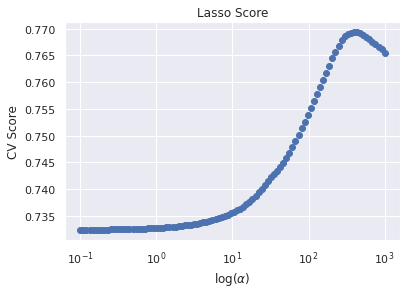

Alpha with max score = 432.87612810830615 with score = 0.7693684206507824


<IPython.core.display.Javascript object>

In [14]:
plt.title("Lasso Score")
plt.ylabel("CV Score")
plt.xlabel(r"log($\alpha$)")
plt.scatter(alphas, lasso_cv_scores)
plt.xscale("log")
plt.show()
alpha_max_lasso = alphas[lasso_cv_scores.index(max(lasso_cv_scores))]
print("Alpha with max score =", alpha_max_lasso, "with score =", max(lasso_cv_scores))

## Ridge Regression

1. search for alphas in range of 0.1 to 100 for Ridge rigression, choose the best which minimizes the mse 
2. Plot the alphas vs MSE


This similar to as explained for Lasso regression. Again plot $\lambda$ vs accuracy (or error) 

For range of alphas use  alphas = np.logspace(-1, 2, 100)

Finally find the $\lambda$ which maximizes the score (or minimizes the error) (appropriate value of $\lambda$ is enough just by seeing the graph)


In [15]:
alphas = np.logspace(
    -1, 3, 100
)  # Using until 1000 since the score is increasing after 100

<IPython.core.display.Javascript object>

In [16]:
ridge_cv_scores = []

for a in alphas:
    model = Ridge(alpha=a)
    ridge_cv_scores.append(np.mean(cross_val_score(model, X_train, y_train, cv=5)))

<IPython.core.display.Javascript object>

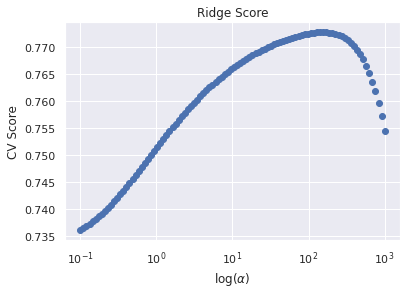

Alpha with max score = 155.56761439304722 with score = 0.7727466492360812


<IPython.core.display.Javascript object>

In [17]:
plt.title("Ridge Score")
plt.ylabel("CV Score")
plt.xlabel(r"log($\alpha$)")
plt.scatter(alphas, ridge_cv_scores)
plt.xscale("log")
plt.show()
alpha_max_ridge = alphas[ridge_cv_scores.index(max(ridge_cv_scores))]
print("Alpha with max score =", alpha_max_ridge, "with score =", max(ridge_cv_scores))

Now compare regularized models to linear Regression model

In the following cell, calculate cross validation score using Linear Regression model

In [18]:
model = LinearRegression()

print(
    "Cross Validation score for Linear Model = ",
    np.mean(cross_val_score(model, X_train, y_train, cv=5)),
)

Cross Validation score for Linear Model =  -3.428900994516782e+18


<IPython.core.display.Javascript object>

Now you have $\lambda$ values for both ridge and lasso regression, predict the model on the test data you created earlier

In the following cell use selected $\lambda$ as the model parameter, predict on test data, compare among three models and report your findings. 




Finally use lasso regression to find the important features and write your observations and also what do you observe when you compare both coefficients of Ridge and Lasso ? Do you see any property of Lasso which is used?
 
Hint: 
- Check weights corresponding to each features


Note:
- Don't worry if you have huge error in prediction, it is possible, just compare among models and report which has lease error.


In [19]:
lasso_model = Lasso(alpha=alpha_max_lasso)
lasso_model.fit(X_train, y_train)
print("Lasso Test error = ", mean_squared_error(y_test, lasso_model.predict(X_test)))
ridge_model = Ridge(alpha=alpha_max_ridge)
ridge_model.fit(X_train, y_train)
print("Ridge Test error = ", mean_squared_error(y_test, ridge_model.predict(X_test)))
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
print("Linear Test error = ", mean_squared_error(y_test, linear_model.predict(X_test)))

Lasso Test error =  1394629117.808681
Ridge Test error =  1403003169.1166043
Linear Test error =  1380497037.1331336


<IPython.core.display.Javascript object>

In [20]:
coeffs = {
    "Feature": [],
    "Lasso_Coefficient": [],
    "Ridge_Coefficient": [],
    "Linear_Coefficient": [],
}

for i, col in enumerate(X_train.columns):
    coeffs["Feature"].append(col)
    coeffs["Lasso_Coefficient"].append(lasso_model.coef_[i])
    coeffs["Ridge_Coefficient"].append(ridge_model.coef_[i])
    coeffs["Linear_Coefficient"].append(linear_model.coef_[i])

<IPython.core.display.Javascript object>

In [21]:
coeff_df = pd.DataFrame(coeffs)
display(coeff_df)

,Feature,Lasso_Coefficient,Ridge_Coefficient,Linear_Coefficient
0,Condition1__Norm,11381.216321,6359.928524,-1.041773e+15
1,1stFlrSF,589.832123,6358.006125,9.017375e+03
2,GarageArea,1141.248303,4246.998872,1.893750e+03
3,Street__Grvl,-0.000000,-295.538908,-1.200988e+04
4,LowQualFinSF,-0.000000,437.605469,8.270000e+02
5,YearBuilt,8419.744669,7269.022058,1.029475e+04
6,BsmtUnfSF,0.000000,-918.594298,-1.176375e+03
7,TotRmsAbvGrd,4062.172424,5279.314923,5.005625e+03
8,Condition1__PosA,-0.000000,-293.441892,-1.041773e+15
9,LotShape__IR2,0.000000,2721.188023,2.399688e+04


<IPython.core.display.Javascript object>

In [22]:
lasso_feat_sel = coeff_df[coeff_df["Lasso_Coefficient"] != 0]["Feature"]
print("\nFeatures selected by lasso : ")
display(lasso_feat_sel.to_frame())


Features selected by lasso : 


,Feature
0,Condition1__Norm
1,1stFlrSF
2,GarageArea
5,YearBuilt
7,TotRmsAbvGrd
11,BsmtFullBath
13,BedroomAbvGr
14,LandContour__HLS
18,GarageCars
19,GrLivArea


<IPython.core.display.Javascript object>

- On comparing the coefficients of Lasso and Ridge, we can see that for some features, the Lasso coefficients is 0. This is due to the feature selection property of Lasso, where it tries to make the coefficients of features which are unnecessary to 0.